In [1]:
%conda create -n is327 python==3.11 -y

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/maxz/miniconda3/envs/is327

  added / updated specs:
    - python==3.11


The following NEW packages will be INSTALLED:

  bzip2              pkgs/main/osx-arm64::bzip2-1.0.8-h80987f9_6 
  ca-certificates    pkgs/main/osx-arm64::ca-certificates-2024.7.2-hca03da5_0 
  libffi             pkgs/main/osx-arm64::libffi-3.4.4-hca03da5_1 
  ncurses            pkgs/main/osx-arm64::ncurses-6.4-h313beb8_0 
  openssl            pkgs/main/osx-arm64::openssl-1.1.1w-h1a28f6b_0 
  pip                pkgs/main/osx-arm64::pip-24.2-py311hca03da5_0 
  python             pkgs/main/osx-arm64::python-3.11.0-hc0d8a6c_3 
  readline           pkgs/main/osx-arm64::readline-8.2-h1a28f6b_0 
  setuptools         pkgs/main/osx-arm64::setuptools-72.1.0-py311hca03da5_0 
  sqlite             pkgs/main/osx-arm64::sqlite-3.45.3-h80987f9_0 
  tk                 pkgs/main/osx-arm64::tk-8.6.14-h6ba3021_0 


In [2]:
!conda install scikit-learn -y

Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/maxz/miniconda3

  added / updated specs:
    - scikit-learn


The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2024.7.4-~ --> pkgs/main/osx-arm64::certifi-2024.7.4-py312hca03da5_0 
  conda              conda-forge::conda-24.7.1-py312h81bd7~ --> pkgs/main::conda-24.7.1-py312hca03da5_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/class_grades.csv")
df

,name,homewk1,homewk2,midterm,partic,exam
0,"Bhirasri, Silpa",58,70,66,90,95
1,"Brookes, John",63,65,74,75,99
2,"Carleton, William",57,0,62,90,91
3,"Carli, Guido",90,73,59,85,94
4,"Cornell, William",73,56,77,95,46
5,"Harvard, John",99,43,73,85,75
6,"Lawrence, Sarah",88,0,82,85,84
7,"Lloyd, Alice",92,72,61,85,96
8,"McGill, James",69,49,67,70,89
9,"Rhodes, Cecil",99,95,63,70,86


(array([1., 0., 0., 0., 0., 4., 2., 4., 2., 7.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

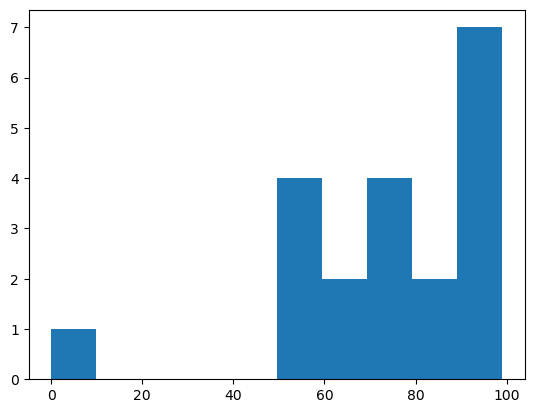

In [6]:
plt.hist(df.homewk1, bins = 10)

In [9]:
df['pass'] = df.exam >65
df['prediction'] = df.homewk1 > 70
df

,name,homewk1,homewk2,midterm,partic,exam,pass,prediction
0,"Bhirasri, Silpa",58,70,66,90,95,True,False
1,"Brookes, John",63,65,74,75,99,True,False
2,"Carleton, William",57,0,62,90,91,True,False
3,"Carli, Guido",90,73,59,85,94,True,True
4,"Cornell, William",73,56,77,95,46,False,True
5,"Harvard, John",99,43,73,85,75,True,True
6,"Lawrence, Sarah",88,0,82,85,84,True,True
7,"Lloyd, Alice",92,72,61,85,96,True,True
8,"McGill, James",69,49,67,70,89,True,False
9,"Rhodes, Cecil",99,95,63,70,86,True,True


In [11]:
(df.prediction == df['pass']).mean()

0.65

In [12]:
best_acc = 0
for cutoff in range(0,100):
    df['prediction'] = df.homewk1 > cutoff
    acc = (df.prediction == df['pass']).mean()
    if acc > best_acc:
        best_acc = acc
        best_cutoff = cutoff
print('Accuracy:', best_acc)
print('Fitted cutoff value:', best_cutoff)

Accuracy: 0.9
Fitted cutoff value: 56
